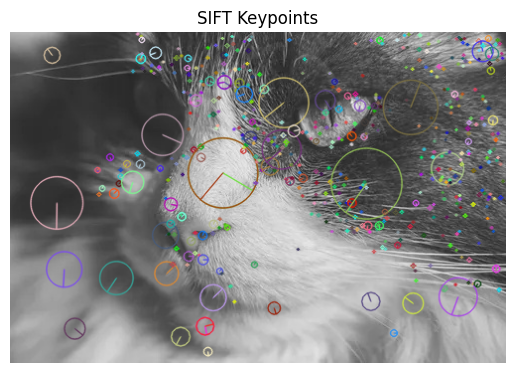

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(img, None)

img_with_keypoints = cv2.drawKeypoints(img, keypoints, None,
                                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_with_keypoints, cmap='gray')
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


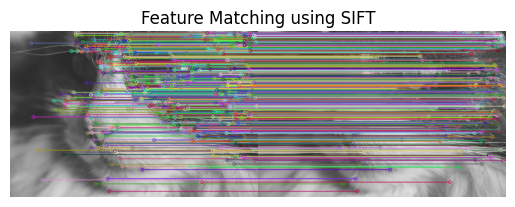

In [ ]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image_converted.jpg', cv2.IMREAD_GRAYSCALE)

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

matched_img = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.imshow(matched_img)
plt.title("Feature Matching using SIFT")
plt.axis('off')
plt.show()


572


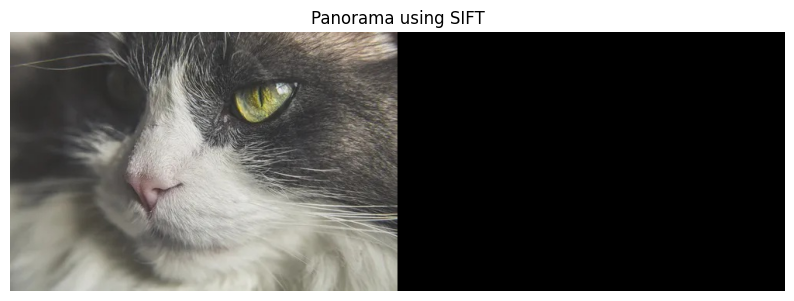

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load input images
img1 = cv2.imread('image_converted.jpg')     # left image
img2 = cv2.imread('grayscale_image.jpg')    # right image

# Convert from BGR to RGB for matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Convert to grayscale for SIFT
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# FLANN matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Check if enough matches
if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Homography
    H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Warp
    width = img1.shape[1] + img2.shape[1]
    height = max(img1.shape[0], img2.shape[0])
    result = cv2.warpPerspective(img2, H, (width, height))
    result[0:img1.shape[0], 0:img1.shape[1]] = img1

    # Convert result to RGB for display
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    print(len(good_matches))

    # Plot result
    plt.figure(figsize=(10, 5))
    plt.imshow(result_rgb)
    plt.title("Panorama using SIFT")
    plt.axis("off")
    plt.show()

else:
    print("Not enough good matches found: {}/{}".format(len(good_matches), 10))
